In [78]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime
import plotly.express as px
import json
import panel as pn
import yfinance as yf
import warnings

# Load .env enviroment variables
load_dotenv()

# Load .env enviroment variables
load_dotenv()

%matplotlib inline

In [79]:
api_key = os.getenv("ALPACA_API_KEY")
api_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

In [80]:
api_key

'PK06YX7R2S9EZM9BVQA0'

In [81]:
api_secret_key

'KJIt3oTcNp8RD9DiWWr0qbGzdfxmyBGfB7RmxQqU'

In [82]:
api = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2"
)


In [83]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2021-02-03", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-05-05", tz="America/New_York").isoformat()

# Set the stock tickers
tickers_stock = ["TSLA","AAPL"]
tickers_crypto = ["BTCUSD","ETHUSD"]
tickers_DOG = ["DOGEUSD"]
#,
#
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version="v2"
)
alpaca

In [84]:
# STOCKS
df_ticker_stocks = alpaca.get_bars(
    tickers_stock,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker_stocks.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-02-03 05:00:00+00:00,135.56,135.770,133.61,133.94,89881134,699074,134.591682,AAPL
2021-02-04 05:00:00+00:00,136.41,137.400,134.59,137.39,84186659,658084,136.186761,AAPL
2021-02-05 05:00:00+00:00,137.35,137.420,135.86,136.76,76395134,616047,136.655920,AAPL
2021-02-08 05:00:00+00:00,136.11,136.960,134.92,136.91,71306129,614476,136.209492,AAPL
2021-02-09 05:00:00+00:00,136.71,137.877,135.85,136.01,76793392,536830,136.734624,AAPL


In [85]:
df_ticker_stocks.index.date

array([datetime.date(2021, 2, 3), datetime.date(2021, 2, 4),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 8),
       datetime.date(2021, 2, 9), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 11), datetime.date(2021, 2, 12),
       datetime.date(2021, 2, 16), datetime.date(2021, 2, 17),
       datetime.date(2021, 2, 18), datetime.date(2021, 2, 19),
       datetime.date(2021, 2, 22), datetime.date(2021, 2, 23),
       datetime.date(2021, 2, 24), datetime.date(2021, 2, 25),
       datetime.date(2021, 2, 26), datetime.date(2021, 3, 1),
       datetime.date(2021, 3, 2), datetime.date(2021, 3, 3),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 8), datetime.date(2021, 3, 9),
       datetime.date(2021, 3, 10), datetime.date(2021, 3, 11),
       datetime.date(2021, 3, 12), datetime.date(2021, 3, 15),
       datetime.date(2021, 3, 16), datetime.date(2021, 3, 17),
       datetime.date(2021, 3, 18), datetime.date(2021, 3, 19),
    

In [86]:
df_ticker_stocks.index = df_ticker_stocks.index.date
df_ticker_stocks

,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,135.56,135.7700,133.61,133.94,89881134,699074,134.591682,AAPL
2021-02-04,136.41,137.4000,134.59,137.39,84186659,658084,136.186761,AAPL
2021-02-05,137.35,137.4200,135.86,136.76,76395134,616047,136.655920,AAPL
2021-02-08,136.11,136.9600,134.92,136.91,71306129,614476,136.209492,AAPL
2021-02-09,136.71,137.8770,135.85,136.01,76793392,536830,136.734624,AAPL
...,...,...,...,...,...,...,...,...
2022-04-29,901.43,934.3999,870.00,870.76,29438762,888856,901.192753,TSLA
2022-05-02,861.63,906.3599,848.03,902.94,25178443,783323,876.904710,TSLA
2022-05-03,902.68,924.0800,888.59,909.25,21187584,605288,908.677578,TSLA
2022-05-04,902.91,955.5000,885.28,952.62,27148468,725687,917.219531,TSLA


In [87]:
df_ticker_stocks_close = df_ticker_stocks.drop(columns=['open','high','low','volume','trade_count','vwap'])
df_ticker_stocks_close.head()

,close,symbol
2021-02-03,133.94,AAPL
2021-02-04,137.39,AAPL
2021-02-05,136.76,AAPL
2021-02-08,136.91,AAPL
2021-02-09,136.01,AAPL


In [88]:
#BITCOIN / ETHERUM DATA

df_ticker_crypto = alpaca.get_crypto_bars(
    tickers_crypto,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker_crypto.tail()

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2022-05-03 05:00:00+00:00,ERSX,2848.27,2851.61,2760.04,2794.23,399.606982,243,2806.759319,ETHUSD
2022-05-03 05:00:00+00:00,FTXU,2849.60,2853.70,2755.70,2794.90,21854.558000,8973,2814.389795,ETHUSD
2022-05-04 05:00:00+00:00,CBSE,2793.56,2969.86,2787.67,2945.14,169062.983838,514627,2885.664621,ETHUSD
2022-05-04 05:00:00+00:00,ERSX,2793.89,2966.14,2793.89,2940.15,834.274257,569,2896.751782,ETHUSD
2022-05-04 05:00:00+00:00,FTXU,2793.80,2965.90,2788.20,2945.70,14089.190000,13085,2882.228007,ETHUSD


In [89]:

df_ticker_crypto_cln = df_ticker_crypto.loc[df_ticker_crypto["exchange"] == "CBSE"]
df_ticker_crypto_cln.head()

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2021-02-03 06:00:00+00:00,CBSE,37688.42,38360.88,37384.69,37632.75,8564.531611,91496,37885.907852,BTCUSD
2021-02-04 06:00:00+00:00,CBSE,37632.75,38769.00,36156.45,36975.00,22380.879822,243852,37350.914910,BTCUSD
2021-02-05 06:00:00+00:00,CBSE,38327.09,39682.01,38250.00,39056.37,8992.480056,106470,39067.193012,BTCUSD
2021-02-06 06:00:00+00:00,CBSE,39057.05,41000.00,39039.44,39265.43,16873.127125,218043,40143.187074,BTCUSD
2021-02-07 06:00:00+00:00,CBSE,38871.43,39190.56,38057.01,38701.98,3542.341950,52583,38593.283408,BTCUSD


In [90]:
df_ticker_crypto_cln.index.date

array([datetime.date(2021, 2, 3), datetime.date(2021, 2, 4),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 6),
       datetime.date(2021, 2, 7), datetime.date(2021, 2, 8),
       datetime.date(2021, 2, 9), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 11), datetime.date(2021, 2, 12),
       datetime.date(2021, 2, 13), datetime.date(2021, 2, 14),
       datetime.date(2021, 2, 15), datetime.date(2021, 2, 16),
       datetime.date(2021, 2, 17), datetime.date(2021, 2, 18),
       datetime.date(2021, 2, 19), datetime.date(2021, 2, 20),
       datetime.date(2021, 2, 21), datetime.date(2021, 2, 22),
       datetime.date(2021, 2, 23), datetime.date(2021, 2, 24),
       datetime.date(2021, 2, 25), datetime.date(2021, 2, 26),
       datetime.date(2021, 2, 27), datetime.date(2021, 2, 28),
       datetime.date(2021, 3, 1), datetime.date(2021, 3, 2),
       datetime.date(2021, 3, 3), datetime.date(2021, 3, 4),
       datetime.date(2021, 3, 5), datetime.date(2021, 3, 6),
     

In [91]:
df_ticker_crypto_cln.index = df_ticker_crypto_cln.index.date
df_ticker_crypto_cln

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,CBSE,37688.42,38360.88,37384.69,37632.75,8564.531611,91496,37885.907852,BTCUSD
2021-02-04,CBSE,37632.75,38769.00,36156.45,36975.00,22380.879822,243852,37350.914910,BTCUSD
2021-02-05,CBSE,38327.09,39682.01,38250.00,39056.37,8992.480056,106470,39067.193012,BTCUSD
2021-02-06,CBSE,39057.05,41000.00,39039.44,39265.43,16873.127125,218043,40143.187074,BTCUSD
2021-02-07,CBSE,38871.43,39190.56,38057.01,38701.98,3542.341950,52583,38593.283408,BTCUSD
...,...,...,...,...,...,...,...,...,...
2022-04-30,CBSE,2821.80,2842.08,2716.40,2772.87,111854.054422,486208,2777.187420,ETHUSD
2022-05-01,CBSE,2773.03,2866.00,2753.09,2856.88,92465.166371,422203,2802.617929,ETHUSD
2022-05-02,CBSE,2856.54,2883.00,2776.26,2848.29,211928.526381,562633,2830.290276,ETHUSD
2022-05-03,CBSE,2848.26,2853.78,2753.66,2793.56,144813.739956,463202,2807.781021,ETHUSD


In [92]:
df_ticker_crypto_close = df_ticker_crypto_cln.drop(columns=['open','high','low','volume','trade_count','vwap'])
df_ticker_crypto_close.head()

,exchange,close,symbol
2021-02-03,CBSE,37632.75,BTCUSD
2021-02-04,CBSE,36975.00,BTCUSD
2021-02-05,CBSE,39056.37,BTCUSD
2021-02-06,CBSE,39265.43,BTCUSD
2021-02-07,CBSE,38701.98,BTCUSD


In [93]:
df_ticker_DOG = alpaca.get_crypto_bars(
    tickers_DOG,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker_DOG

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2021-02-03 06:00:00+00:00,FTXU,0.032109,0.043200,0.031107,0.039809,4874856,500,0.037675,DOGEUSD
2021-02-04 06:00:00+00:00,FTXU,0.039876,0.060637,0.039663,0.046409,29829799,1804,0.048408,DOGEUSD
2021-02-05 06:00:00+00:00,FTXU,0.046137,0.051198,0.043476,0.049298,3855118,469,0.047151,DOGEUSD
2021-02-06 06:00:00+00:00,FTXU,0.048691,0.065893,0.048005,0.056158,12310707,867,0.056036,DOGEUSD
2021-02-07 06:00:00+00:00,FTXU,0.057160,0.089033,0.056876,0.071170,23502657,1567,0.073420,DOGEUSD
...,...,...,...,...,...,...,...,...,...
2022-04-30 05:00:00+00:00,FTXU,0.135705,0.137002,0.124000,0.129223,20456112,2412,0.130598,DOGEUSD
2022-05-01 05:00:00+00:00,FTXU,0.129319,0.136433,0.129095,0.132830,14232750,1420,0.132098,DOGEUSD
2022-05-02 05:00:00+00:00,FTXU,0.132797,0.133786,0.127615,0.131703,15267110,1212,0.130950,DOGEUSD


In [94]:
df_ticker_DOG.index.date

array([datetime.date(2021, 2, 3), datetime.date(2021, 2, 4),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 6),
       datetime.date(2021, 2, 7), datetime.date(2021, 2, 8),
       datetime.date(2021, 2, 9), datetime.date(2021, 2, 10),
       datetime.date(2021, 2, 11), datetime.date(2021, 2, 12),
       datetime.date(2021, 2, 13), datetime.date(2021, 2, 14),
       datetime.date(2021, 2, 15), datetime.date(2021, 2, 16),
       datetime.date(2021, 2, 17), datetime.date(2021, 2, 18),
       datetime.date(2021, 2, 19), datetime.date(2021, 2, 20),
       datetime.date(2021, 2, 21), datetime.date(2021, 2, 22),
       datetime.date(2021, 2, 23), datetime.date(2021, 2, 24),
       datetime.date(2021, 2, 25), datetime.date(2021, 2, 26),
       datetime.date(2021, 2, 27), datetime.date(2021, 2, 28),
       datetime.date(2021, 3, 1), datetime.date(2021, 3, 2),
       datetime.date(2021, 3, 3), datetime.date(2021, 3, 4),
       datetime.date(2021, 3, 5), datetime.date(2021, 3, 6),
     

In [95]:
df_ticker_DOG.index = df_ticker_DOG.index.date
df_ticker_DOG

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,FTXU,0.032109,0.043200,0.031107,0.039809,4874856,500,0.037675,DOGEUSD
2021-02-04,FTXU,0.039876,0.060637,0.039663,0.046409,29829799,1804,0.048408,DOGEUSD
2021-02-05,FTXU,0.046137,0.051198,0.043476,0.049298,3855118,469,0.047151,DOGEUSD
2021-02-06,FTXU,0.048691,0.065893,0.048005,0.056158,12310707,867,0.056036,DOGEUSD
2021-02-07,FTXU,0.057160,0.089033,0.056876,0.071170,23502657,1567,0.073420,DOGEUSD
...,...,...,...,...,...,...,...,...,...
2022-04-30,FTXU,0.135705,0.137002,0.124000,0.129223,20456112,2412,0.130598,DOGEUSD
2022-05-01,FTXU,0.129319,0.136433,0.129095,0.132830,14232750,1420,0.132098,DOGEUSD
2022-05-02,FTXU,0.132797,0.133786,0.127615,0.131703,15267110,1212,0.130950,DOGEUSD
2022-05-03,FTXU,0.131834,0.131834,0.126384,0.129568,17253108,1337,0.129808,DOGEUSD


In [96]:
df_ticker_DOG_close = df_ticker_DOG.drop(columns=['open','high','low','volume','trade_count','vwap'])
df_ticker_DOG_close.head()

,exchange,close,symbol
2021-02-03,FTXU,0.039809,DOGEUSD
2021-02-04,FTXU,0.046409,DOGEUSD
2021-02-05,FTXU,0.049298,DOGEUSD
2021-02-06,FTXU,0.056158,DOGEUSD
2021-02-07,FTXU,0.071170,DOGEUSD


In [97]:
# df_ticker_stocks.index.intersection(df_ticker_DOG_close.index)
#df_ticker2 = df_ticker2[~ (df_ticker2.AAPL.isnull(), df_ticker2.TSLA.isnull())]


### CONCATINATIONS 

In [98]:
#CONCATINATE
df_ticker_base = pd.concat([df_ticker_stocks,df_ticker_crypto_cln,df_ticker_DOG], axis = 'rows', join = 'inner').dropna()
df_ticker_base

,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,135.560000,135.770000,133.610000,133.940000,89881134.0,699074,134.591682,AAPL
2021-02-04,136.410000,137.400000,134.590000,137.390000,84186659.0,658084,136.186761,AAPL
2021-02-05,137.350000,137.420000,135.860000,136.760000,76395134.0,616047,136.655920,AAPL
2021-02-08,136.110000,136.960000,134.920000,136.910000,71306129.0,614476,136.209492,AAPL
2021-02-09,136.710000,137.877000,135.850000,136.010000,76793392.0,536830,136.734624,AAPL
...,...,...,...,...,...,...,...,...
2022-04-30,0.135705,0.137002,0.124000,0.129223,20456112.0,2412,0.130598,DOGEUSD
2022-05-01,0.129319,0.136433,0.129095,0.132830,14232750.0,1420,0.132098,DOGEUSD
2022-05-02,0.132797,0.133786,0.127615,0.131703,15267110.0,1212,0.130950,DOGEUSD
2022-05-03,0.131834,0.131834,0.126384,0.129568,17253108.0,1337,0.129808,DOGEUSD


In [99]:
#pd.crosstab(id_vars=['index']df_ticker1.close, df_ticker1.symbol,margins=True)
#Reshape dataframe with pivot functtion

df_ticker2 = df_ticker_base.pivot(columns='symbol',
                 values = 'close'
                )
df_ticker2.dropna(inplace = True)
df_ticker2

symbol,AAPL,BTCUSD,DOGEUSD,ETHUSD,TSLA
2021-02-03,133.94,37632.75,0.039809,1657.11,854.69
2021-02-04,137.39,36975.00,0.046409,1597.55,849.99
2021-02-05,136.76,39056.37,0.049298,1662.98,852.23
2021-02-08,136.91,46448.10,0.081349,1745.70,863.42
2021-02-09,136.01,46514.73,0.073563,1801.61,849.46
...,...,...,...,...,...
2022-04-28,163.64,39532.21,0.144619,2918.50,877.51
2022-04-29,157.65,38564.33,0.135492,2821.79,870.76
2022-05-02,157.96,38491.16,0.131703,2848.29,902.94
2022-05-03,159.48,37976.48,0.129568,2793.56,909.25


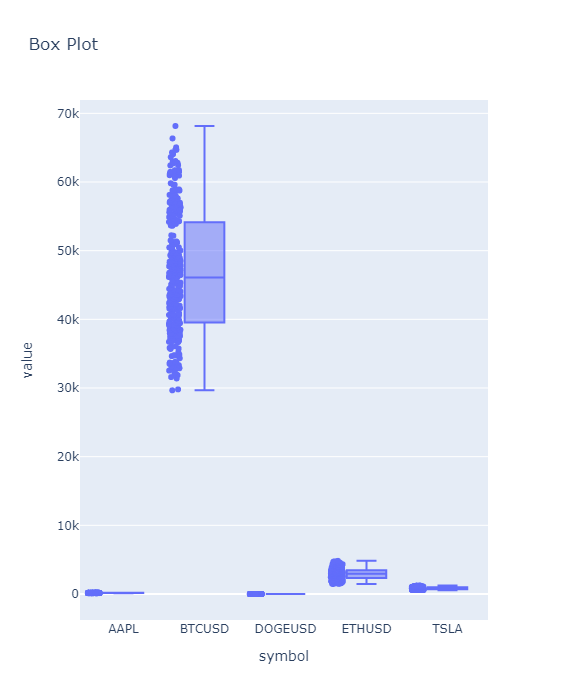

In [100]:

box_plot = px.box(df_ticker2, points="all",height=700, width=1500,title='Box Plot')
box_plot
#what doea it tell me? 

In [101]:
# Calculate Daily Returns
Daily_ret = df_ticker2.pct_change().dropna()
Daily_ret.head()


symbol,AAPL,BTCUSD,DOGEUSD,ETHUSD,TSLA
2021-02-04,0.025758,-0.017478,0.165790,-0.035942,-0.005499
2021-02-05,-0.004585,0.056291,0.062229,0.040956,0.002635
2021-02-08,0.001097,0.189258,0.650155,0.049742,0.013130
2021-02-09,-0.006574,0.001435,-0.095706,0.032027,-0.016168
2021-02-10,-0.004558,-0.035789,-0.011052,-0.032571,-0.052551


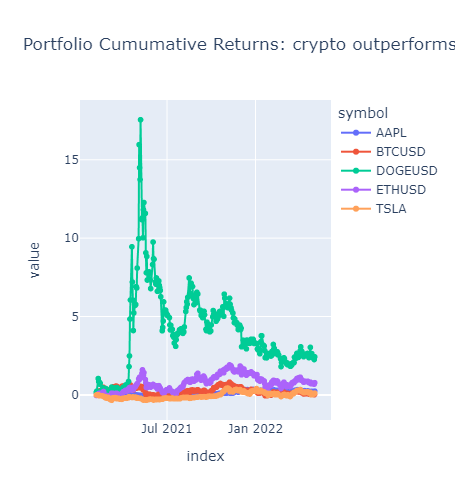

In [102]:
# Calculate cumulative returns of all portfolios

Portfolio_df_cum = (1+ Daily_ret).cumprod(0) -1
Portfolio_df_cum.head()

# Plot cumulative returns

# Portfolio_df_cum_plot = Portfolio_df_cum.hvplot.line()
# Portfolio_df_cum_plot

#Portfolio_df_cum.plot(figsize=(25,10))

def portfolio_ret():
    Portfolio_returns = px.line(Portfolio_df_cum, title='Portfolio Cumumative Returns: crypto outperforms',height=500, width=800, markers = True)
    return Portfolio_returns
portfolio_ret()

In [103]:
#St deviation annualised

daily_std = df_ticker2.std().sort_values(ascending = False)
daily_std.head()
#Comment 

symbol
BTCUSD     8697.420153
ETHUSD      818.262384
TSLA        170.145971
AAPL         17.593460
DOGEUSD       0.108193
dtype: float64

<AxesSubplot:>

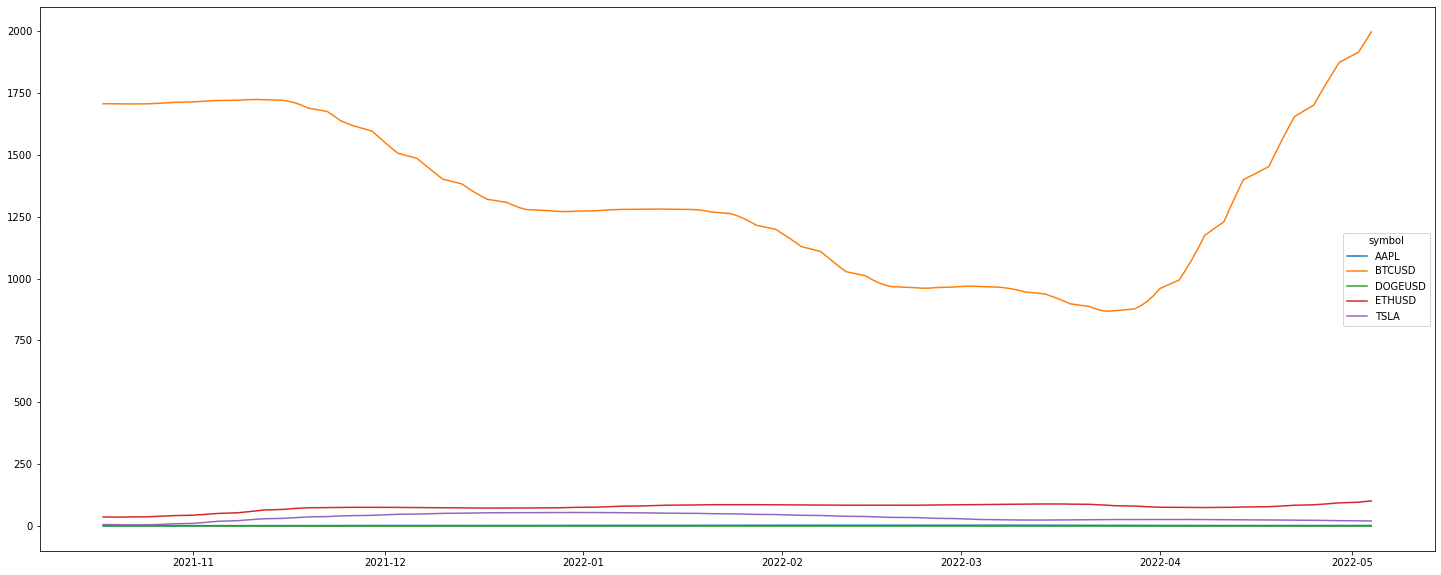

In [104]:
# Calculate the rolling standard deviation for all portfolios using a 90-day window

roll_daily_std = df_ticker2.rolling(window = 90).std()

# Plot the rolling standard deviation
roll_daily_std.rolling(window = 90).std().plot(figsize = (25,10))

In [105]:
# df=cf.datagen.ohlc()
# qf=cf.QuantFig(df_ticker2,title='Portfolio Price Trends',legend='top',name='GS')
# qf.add_bollinger_bands()
# qf.iplot()

In [106]:
#cf.datagen.lines(2).iplot(kind='spread',xTitle='Dates',yTitle='Return',title='Cufflinks - Spread Chart')

# Billinger Bands


In [107]:
#Tesla
df_ticker_TSLA = df_ticker_base
df_ticker_TSLA = df_ticker_base.loc[df_ticker_base["symbol"] == "TSLA"]
df_ticker_TSLA = df_ticker_TSLA[~df_ticker_TSLA.index.duplicated()]
df_ticker_TSLA.drop(columns=['high'])
df_ticker_TSLA

,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,877.64,878.0800,853.0646,854.69,18343510.0,565774,861.138473,TSLA
2021-02-04,855.00,856.5000,833.4200,849.99,15812762.0,488969,844.533129,TSLA
2021-02-05,845.42,864.7700,838.9700,852.23,18566637.0,503361,852.551977,TSLA
2021-02-08,870.00,877.7700,854.7500,863.42,20162538.0,577775,865.600914,TSLA
2021-02-09,855.70,859.8000,841.7500,849.46,15157682.0,537355,849.223905,TSLA
...,...,...,...,...,...,...,...,...
2022-04-29,901.43,934.3999,870.0000,870.76,29438762.0,888856,901.192753,TSLA
2022-05-02,861.63,906.3599,848.0300,902.94,25178443.0,783323,876.904710,TSLA
2022-05-03,902.68,924.0800,888.5900,909.25,21187584.0,605288,908.677578,TSLA
2022-05-04,902.91,955.5000,885.2800,952.62,27148468.0,725687,917.219531,TSLA


In [108]:
#Bollinger bands function

def Bollingerbands(data, n_loockback, n_std=2):
    hlc_avg = (data.high + data.low + data.close)/3
    mean, std = hlc_avg.rolling(n_loockback).mean(), hlc_avg.rolling(n_loockback).std()
    upper, lower = mean + std*n_std, mean - std*n_std
    return upper, lower 


In [109]:
df_ticker_TSLA['BBLUp'], df_ticker_TSLA['BBLDown'] = Bollingerbands(df_ticker_TSLA, 7, 2)
df_ticker_TSLA.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-03,877.64,878.0800,853.0646,854.69,18343510.0,565774,861.138473,TSLA,NaN,NaN
2021-02-04,855.00,856.5000,833.4200,849.99,15812762.0,488969,844.533129,TSLA,NaN,NaN
2021-02-05,845.42,864.7700,838.9700,852.23,18566637.0,503361,852.551977,TSLA,NaN,NaN
2021-02-08,870.00,877.7700,854.7500,863.42,20162538.0,577775,865.600914,TSLA,NaN,NaN
2021-02-09,855.70,859.8000,841.7500,849.46,15157682.0,537355,849.223905,TSLA,NaN,NaN
2021-02-10,843.64,844.8200,800.0200,804.82,36216149.0,1269213,814.745419,TSLA,NaN,NaN
2021-02-11,812.34,829.8799,801.7250,811.66,21623053.0,634541,813.720906,TSLA,884.835012,802.935416
2021-02-12,801.46,817.3300,785.3306,816.12,23768393.0,822151,800.968856,TSLA,881.842139,790.018385
2021-02-16,818.01,821.0000,792.4400,796.22,19802602.0,703338,803.631013,TSLA,880.376330,779.079432
2021-02-17,778.17,799.8400,762.0100,798.15,26080058.0,925853,781.230234,TSLA,875.755247,765.036706


In [110]:
df_ticker_TSLA_cln = df_ticker_TSLA.dropna()
df_ticker_TSLA_cln.head()

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-11,812.34,829.8799,801.7250,811.66,21623053.0,634541,813.720906,TSLA,884.835012,802.935416
2021-02-12,801.46,817.3300,785.3306,816.12,23768393.0,822151,800.968856,TSLA,881.842139,790.018385
2021-02-16,818.01,821.0000,792.4400,796.22,19802602.0,703338,803.631013,TSLA,880.376330,779.079432
2021-02-17,778.17,799.8400,762.0100,798.15,26080058.0,925853,781.230234,TSLA,875.755247,765.036706
2021-02-18,780.90,794.6900,776.2700,787.38,17960528.0,563102,786.468944,TSLA,852.736491,765.426890


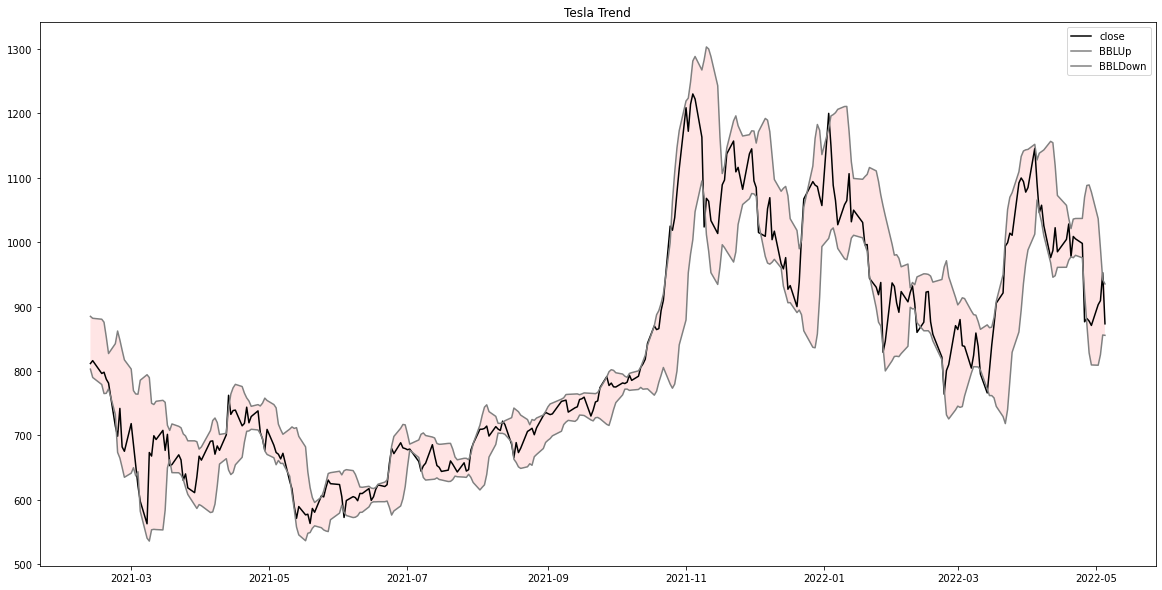

In [111]:
import matplotlib.pyplot as plt
def plot_tesla():
    plt.rcParams['figure.figsize'] = (20,10)
    TSLABB_chart = df_ticker_TSLA_cln[['close', 'BBLUp', 'BBLDown']].plot(color = ['black', 'grey', 'grey'], title = 'Tesla Trend')
    TSLABB_chart.fill_between(df_ticker_TSLA_cln.index, df_ticker_TSLA_cln['BBLUp'], df_ticker_TSLA_cln['BBLDown'], facecolor = 'red', alpha=0.1)
plot_tesla()

In [112]:
#Apple
df_ticker_AAPL = df_ticker_base
df_ticker_AAPL = df_ticker_base.loc[df_ticker_base["symbol"] == "AAPL"]
df_ticker_AAPL = df_ticker_AAPL[~df_ticker_AAPL.index.duplicated()]
df_ticker_AAPL.drop(columns=['high'])
df_ticker_AAPL.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
2022-04-29,161.84,166.20,157.25,157.65,131724463.0,1028256,160.710096,AAPL
2022-05-02,156.65,158.23,153.27,157.96,122860515.0,1148543,156.032933,AAPL
2022-05-03,158.06,160.71,156.32,159.48,88581314.0,702272,158.800246,AAPL
2022-05-04,159.65,166.48,159.26,166.02,108376463.0,867145,162.405193,AAPL
2022-05-05,163.66,164.08,154.95,156.77,129993551.0,1157695,158.146266,AAPL


In [113]:
df_ticker_AAPL['BBLUp'], df_ticker_AAPL['BBLDown'] = Bollingerbands(df_ticker_AAPL, 7, 2)
df_ticker_AAPL.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-03,135.56,135.770,133.6100,133.94,89881134.0,699074,134.591682,AAPL,NaN,NaN
2021-02-04,136.41,137.400,134.5900,137.39,84186659.0,658084,136.186761,AAPL,NaN,NaN
2021-02-05,137.35,137.420,135.8600,136.76,76395134.0,616047,136.655920,AAPL,NaN,NaN
2021-02-08,136.11,136.960,134.9200,136.91,71306129.0,614476,136.209492,AAPL,NaN,NaN
2021-02-09,136.71,137.877,135.8500,136.01,76793392.0,536830,136.734624,AAPL,NaN,NaN
2021-02-10,136.49,136.990,134.4000,135.39,73046563.0,605206,135.480029,AAPL,NaN,NaN
2021-02-11,135.98,136.390,133.7700,135.13,64430059.0,547790,134.863104,AAPL,137.582188,134.164193
2021-02-12,134.28,135.530,133.6921,135.37,60145413.0,481811,134.520650,AAPL,137.421424,134.446109
2021-02-16,135.47,136.010,132.7900,133.19,80577056.0,741085,133.864335,AAPL,137.569870,133.593854
2021-02-17,131.23,132.220,129.4700,130.84,98145249.0,971321,130.590282,AAPL,138.604591,130.891513


In [114]:
df_ticker_AAPL_cln = df_ticker_AAPL.dropna()
df_ticker_AAPL_cln.head()

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-11,135.98,136.390,133.7700,135.13,64430059.0,547790,134.863104,AAPL,137.582188,134.164193
2021-02-12,134.28,135.530,133.6921,135.37,60145413.0,481811,134.520650,AAPL,137.421424,134.446109
2021-02-16,135.47,136.010,132.7900,133.19,80577056.0,741085,133.864335,AAPL,137.569870,133.593854
2021-02-17,131.23,132.220,129.4700,130.84,98145249.0,971321,130.590282,AAPL,138.604591,130.891513
2021-02-18,129.22,129.995,127.4100,129.71,96857495.0,859579,128.861045,AAPL,139.202677,128.229142


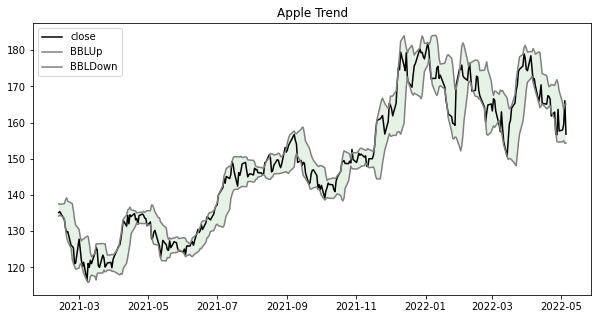

In [115]:
def plot_apple():
    plt.rcParams['figure.figsize'] = (10,5)
    AAPLBB_chart = df_ticker_AAPL_cln[['close', 'BBLUp', 'BBLDown']].plot(color = ['black', 'grey', 'grey'], title = 'Apple Trend')
    AAPLBB_chart.fill_between(df_ticker_AAPL_cln.index, df_ticker_AAPL_cln['BBLUp'], df_ticker_AAPL_cln['BBLDown'], facecolor = 'green', alpha=0.1)
plot_apple()

In [116]:
#Bitcoin
df_ticker_BTC = df_ticker_base
df_ticker_BTC = df_ticker_base.loc[df_ticker_base["symbol"] == "BTCUSD"]
df_ticker_BTC = df_ticker_BTC[~df_ticker_BTC.index.duplicated()]
df_ticker_BTC.drop(columns=['high'])
df_ticker_BTC.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
2022-04-30,38566.25,38779.57,37401.00,37963.72,7873.367671,468428,38166.312077,BTCUSD
2022-05-01,37964.35,39181.27,37676.78,38973.42,8188.156646,419879,38335.692234,BTCUSD
2022-05-02,38972.11,39161.67,38041.00,38491.16,18383.658463,574810,38614.670166,BTCUSD
2022-05-03,38492.08,38643.48,37505.01,37976.48,17140.676106,520048,38077.514343,BTCUSD
2022-05-04,37976.48,40038.27,37950.01,39728.88,21706.912446,608997,39221.226695,BTCUSD


In [117]:
df_ticker_BTC['BBLUp'], df_ticker_BTC['BBLDown'] = Bollingerbands(df_ticker_BTC, 7, 2)
df_ticker_BTC.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-03,37688.42,38360.88,37384.69,37632.75,8564.531611,91496,37885.907852,BTCUSD,NaN,NaN
2021-02-04,37632.75,38769.00,36156.45,36975.00,22380.879822,243852,37350.914910,BTCUSD,NaN,NaN
2021-02-05,38327.09,39682.01,38250.00,39056.37,8992.480056,106470,39067.193012,BTCUSD,NaN,NaN
2021-02-06,39057.05,41000.00,39039.44,39265.43,16873.127125,218043,40143.187074,BTCUSD,NaN,NaN
2021-02-07,38871.43,39190.56,38057.01,38701.98,3542.341950,52583,38593.283408,BTCUSD,NaN,NaN
2021-02-08,38703.08,46750.00,38642.90,46448.10,36831.614666,409804,43411.518929,BTCUSD,NaN,NaN
2021-02-09,46949.44,48200.00,45020.00,46514.73,22791.482046,306485,46770.125491,BTCUSD,47389.440602,33476.968922
2021-02-10,46180.31,47349.99,43706.86,44850.00,18160.589600,272432,45286.629807,BTCUSD,48866.416160,34145.567650
2021-02-11,47993.60,48912.00,46951.25,47300.88,7090.809267,92000,47869.785452,BTCUSD,50596.979599,35392.497544
2021-02-12,47295.72,48200.00,46300.00,47408.34,15553.542115,246196,47451.223689,BTCUSD,51457.126159,36905.680508


In [118]:
df_ticker_BTC_cln = df_ticker_BTC.dropna()
df_ticker_BTC_cln.head()

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-09,46949.44,48200.00,45020.00,46514.73,22791.482046,306485,46770.125491,BTCUSD,47389.440602,33476.968922
2021-02-10,46180.31,47349.99,43706.86,44850.00,18160.589600,272432,45286.629807,BTCUSD,48866.416160,34145.567650
2021-02-11,47993.60,48912.00,46951.25,47300.88,7090.809267,92000,47869.785452,BTCUSD,50596.979599,35392.497544
2021-02-12,47295.72,48200.00,46300.00,47408.34,15553.542115,246196,47451.223689,BTCUSD,51457.126159,36905.680508
2021-02-13,47975.72,48000.00,46300.00,47232.45,8399.280703,175644,47057.506707,BTCUSD,51620.185193,38859.533854


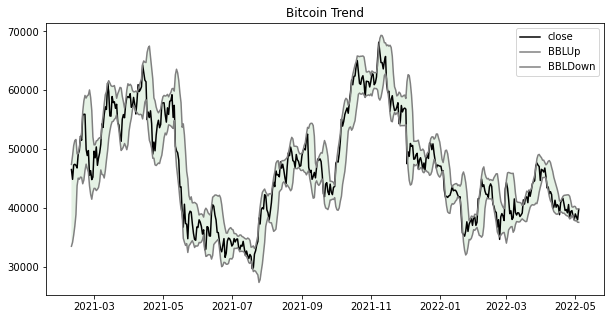

In [119]:
def plot_bitcoin():
    plt.rcParams['figure.figsize'] = (10,5)
    BTCLBB_chart = df_ticker_BTC_cln[['close', 'BBLUp', 'BBLDown']].plot(color = ['black', 'grey', 'grey'], title = 'Bitcoin Trend')
    BTCLBB_chart.fill_between(df_ticker_BTC_cln.index, df_ticker_BTC_cln['BBLUp'], df_ticker_BTC_cln['BBLDown'], facecolor = 'green', alpha=0.1)
plot_bitcoin()

In [120]:
#Dodgecoin
df_ticker_DOG = df_ticker_base
df_ticker_DOG = df_ticker_base.loc[df_ticker_base["symbol"] == "DOGEUSD"]
df_ticker_DOG = df_ticker_DOG[~df_ticker_DOG.index.duplicated()]
df_ticker_DOG.drop(columns=['high'])
df_ticker_DOG.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,0.032109,0.043200,0.031107,0.039809,4874856.0,500,0.037675,DOGEUSD
2021-02-04,0.039876,0.060637,0.039663,0.046409,29829799.0,1804,0.048408,DOGEUSD
2021-02-05,0.046137,0.051198,0.043476,0.049298,3855118.0,469,0.047151,DOGEUSD
2021-02-06,0.048691,0.065893,0.048005,0.056158,12310707.0,867,0.056036,DOGEUSD
2021-02-07,0.057160,0.089033,0.056876,0.071170,23502657.0,1567,0.073420,DOGEUSD


In [121]:
df_ticker_DOG['BBLUp'], df_ticker_DOG['BBLDown'] = Bollingerbands(df_ticker_DOG, 7, 2)
df_ticker_DOG.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-03,0.032109,0.043200,0.031107,0.039809,4874856.0,500,0.037675,DOGEUSD,NaN,NaN
2021-02-04,0.039876,0.060637,0.039663,0.046409,29829799.0,1804,0.048408,DOGEUSD,NaN,NaN
2021-02-05,0.046137,0.051198,0.043476,0.049298,3855118.0,469,0.047151,DOGEUSD,NaN,NaN
2021-02-06,0.048691,0.065893,0.048005,0.056158,12310707.0,867,0.056036,DOGEUSD,NaN,NaN
2021-02-07,0.057160,0.089033,0.056876,0.071170,23502657.0,1567,0.073420,DOGEUSD,NaN,NaN
2021-02-08,0.071200,0.086172,0.068000,0.081349,7046079.0,734,0.078966,DOGEUSD,NaN,NaN
2021-02-09,0.081156,0.081308,0.064108,0.073563,6081777.0,854,0.073429,DOGEUSD,0.090141,0.028566
2021-02-10,0.073975,0.082000,0.066316,0.072750,3399287.0,624,0.073360,DOGEUSD,0.090155,0.038738
2021-02-11,0.073030,0.074632,0.060105,0.067239,4119474.0,410,0.067041,DOGEUSD,0.088828,0.045328
2021-02-12,0.066714,0.072820,0.063384,0.069553,996367.0,300,0.068443,DOGEUSD,0.083851,0.056190


In [122]:
df_ticker_DOG_cln = df_ticker_DOG.dropna()
df_ticker_DOG_cln.head()

,open,high,low,close,volume,trade_count,vwap,symbol,BBLUp,BBLDown
2021-02-09,0.081156,0.081308,0.064108,0.073563,6081777.0,854,0.073429,DOGEUSD,0.090141,0.028566
2021-02-10,0.073975,0.082000,0.066316,0.072750,3399287.0,624,0.073360,DOGEUSD,0.090155,0.038738
2021-02-11,0.073030,0.074632,0.060105,0.067239,4119474.0,410,0.067041,DOGEUSD,0.088828,0.045328
2021-02-12,0.066714,0.072820,0.063384,0.069553,996367.0,300,0.068443,DOGEUSD,0.083851,0.056190
2021-02-13,0.068769,0.069868,0.062942,0.063974,1554013.0,476,0.066395,DOGEUSD,0.080138,0.062449


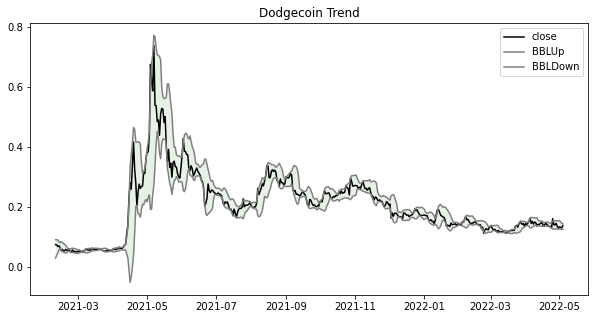

In [123]:
def plot_dodge():
    plt.rcParams['figure.figsize'] = (10,5)
    DOGBB_chart = df_ticker_DOG_cln[['close', 'BBLUp', 'BBLDown']].plot(color = ['black', 'grey', 'grey'], title = 'Dodgecoin Trend')
    DOGBB_chart.fill_between(df_ticker_DOG_cln.index, df_ticker_DOG_cln['BBLUp'], df_ticker_DOG_cln['BBLDown'], facecolor = 'green', alpha=0.1)
plot_dodge()

In [124]:
#Yahoofinacne library
symbol = yf.Ticker('BTC-USD')
BTC_df = symbol.history(period='max')
BTC_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


In [125]:
def BollingerbandsY(data, n_loockback, n_std=2):
    hlc_avg = (data.High + data.Low + data.Close)/3
    mean, std = hlc_avg.rolling(n_loockback).mean(), hlc_avg.rolling(n_loockback).std()
    upper, lower = mean + std*n_std, mean - std*n_std
    return upper, lower 


In [126]:
BTC_df['BBLUp'], BTC_df['BBLDown'] = BollingerbandsY(BTC_df, 7, 2)
BTC_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,BBLUp,BBLDown
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0,NaN,NaN
2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,0,0,NaN,NaN
2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,0,0,461.676242,375.061946
2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,0,0,440.280566,387.173713
2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,0,0,433.028985,389.678436


In [127]:
BTCY_df_cln = BTC_df.dropna()
BTCY_df_cln.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,BBLUp,BBLDown
Date,,,,,,,,,
2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,0,0,461.676242,375.061946
2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,0,0,440.280566,387.173713
2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,0,0,433.028985,389.678436
2014-09-26,411.428986,414.937988,400.009003,404.424988,21460800,0,0,432.686715,391.183466
2014-09-27,403.556000,406.622986,397.372009,399.519989,15029300,0,0,433.192887,388.908914
2014-09-28,399.471008,401.016998,374.332001,377.181000,23613300,0,0,438.280237,378.878896
2014-09-29,376.928009,385.210999,372.239990,375.467010,32497700,0,0,442.974330,367.205756
2014-09-30,376.088013,390.976990,373.442993,386.944000,34707300,0,0,435.716578,362.827222
2014-10-01,387.427002,391.378998,380.779999,383.614990,26229400,0,0,421.421626,365.248366


NameError: name 'DOGBB_chart' is not defined

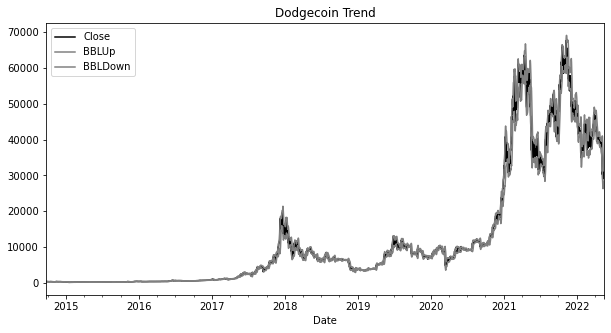

In [128]:
plt.rcParams['figure.figsize'] = (10,5)
BTCY_chart = BTCY_df_cln[['Close', 'BBLUp', 'BBLDown']].plot(color = ['black', 'grey', 'grey'], title = 'Dodgecoin Trend')
DOGBB_chart.fill_between(BTCY_df_cln.index, BTCY_df_cln['BBLUp'], BTCY_df_cln['BBLDown'], facecolor = 'green', alpha=0.1)
plt.show()

In [129]:
df_ticker2_cln = df_ticker_base[~df_ticker_base.index.duplicated()]
df_ticker2_cln.head()

,open,high,low,close,volume,trade_count,vwap,symbol
2021-02-03,135.56,135.770,133.61,133.94,89881134.0,699074,134.591682,AAPL
2021-02-04,136.41,137.400,134.59,137.39,84186659.0,658084,136.186761,AAPL
2021-02-05,137.35,137.420,135.86,136.76,76395134.0,616047,136.655920,AAPL
2021-02-08,136.11,136.960,134.92,136.91,71306129.0,614476,136.209492,AAPL
2021-02-09,136.71,137.877,135.85,136.01,76793392.0,536830,136.734624,AAPL


In [130]:
# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker_base[df_ticker_base['symbol']=='TSLA'].drop('symbol', axis=1)
#AAPL = df_ticker_base[df_ticker_base['symbol']=='AAPL'].drop('symbol', axis=1)
BTC = df_ticker_base[df_ticker_base['symbol']=='BTCUSD'].drop('symbol', axis=1)
#ETH = df_ticker_base[df_ticker_base['symbol']=='ETHUSD'].drop('symbol', axis=1)
DOG = df_ticker_base[df_ticker_base['symbol']=='DOGEUSD'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker2_cln = pd.concat([TSLA, BTC, DOG], axis=1, keys=["TSLA","BTCUSD","DOGEUSD"])
df_ticker2_final = df_ticker2_cln.dropna()
# Display sample data
df_ticker2_final.head()

TSLA                                                    \
              open    high       low   close      volume trade_count   
2021-02-03  877.64  878.08  853.0646  854.69  18343510.0    565774.0   
2021-02-04  855.00  856.50  833.4200  849.99  15812762.0    488969.0   
2021-02-05  845.42  864.77  838.9700  852.23  18566637.0    503361.0   
2021-02-08  870.00  877.77  854.7500  863.42  20162538.0    577775.0   
2021-02-09  855.70  859.80  841.7500  849.46  15157682.0    537355.0   

                          BTCUSD                      ...                \
                  vwap      open      high       low  ...        volume   
2021-02-03  861.138473  37688.42  38360.88  37384.69  ...   8564.531611   
2021-02-04  844.533129  37632.75  38769.00  36156.45  ...  22380.879822   
2021-02-05  852.551977  38327.09  39682.01  38250.00  ...   8992.480056   
2021-02-08  865.600914  38703.08  46750.00  38642.90  ...  36831.614666   
2021-02-09  849.223905  46949.44  48200.00  45020.00  ...  22791.482046   

                                       DOGEUSD                                \
           trade_count          vwap      open      high       low     close   
2021-02-03     91496.0  37885.907852  0.032109  0.043200  0.031107  0.039809   
2021-02-04    243852.0  37350.914910  0.039876  0.060637  0.039663  0.046409   
2021-02-05    106470.0  39067.193012  0.046137  0.051198  0.043476  0.049298   
2021-02-08    409804.0  43411.518929  0.071200  0.086172  0.068000  0.081349   
2021-02-09    306485.0  46770.125491  0.081156  0.081308  0.064108  0.073563   

                                              
                volume trade_count      vwap  
2021-02-03   4874856.0       500.0  0.037675  
2021-02-04  29829799.0      1804.0  0.048408  
2021-02-05   3855118.0       469.0  0.047151  
2021-02-08   7046079.0       734.0  0.078966  
2021-02-09   6081777.0       854.0  0.073429  

[5 rows x 21 columns]

In [131]:
weight = np.random.random(3)
weight /= weight.sum()
weight 

array([0.39638279, 0.51142494, 0.09219227])

In [132]:
MC_5year = MCSimulation(
    portfolio_data = df_ticker2_final,
    weights = weight,
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_5year.portfolio_data.head()

C:\Users\Mirek\JUPITER\Project Work\Project_1\First_project\MCForecastTools.py:53: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TSLA                                                    \
              open    high       low   close      volume trade_count   
2021-02-03  877.64  878.08  853.0646  854.69  18343510.0    565774.0   
2021-02-04  855.00  856.50  833.4200  849.99  15812762.0    488969.0   
2021-02-05  845.42  864.77  838.9700  852.23  18566637.0    503361.0   
2021-02-08  870.00  877.77  854.7500  863.42  20162538.0    577775.0   
2021-02-09  855.70  859.80  841.7500  849.46  15157682.0    537355.0   

                                       BTCUSD            ...                \
                  vwap daily_return      open      high  ...          vwap   
2021-02-03  861.138473          NaN  37688.42  38360.88  ...  37885.907852   
2021-02-04  844.533129    -0.005499  37632.75  38769.00  ...  37350.914910   
2021-02-05  852.551977     0.002635  38327.09  39682.01  ...  39067.193012   
2021-02-08  865.600914     0.013130  38703.08  46750.00  ...  43411.518929   
2021-02-09  849.223905    -0.016168  46949.44  48200.00  ...  46770.125491   

                          DOGEUSD                                            \
           daily_return      open      high       low     close      volume   
2021-02-03          NaN  0.032109  0.043200  0.031107  0.039809   4874856.0   
2021-02-04    -0.017478  0.039876  0.060637  0.039663  0.046409  29829799.0   
2021-02-05     0.056291  0.046137  0.051198  0.043476  0.049298   3855118.0   
2021-02-08     0.189258  0.071200  0.086172  0.068000  0.081349   7046079.0   
2021-02-09     0.001435  0.081156  0.081308  0.064108  0.073563   6081777.0   

                                               
           trade_count      vwap daily_return  
2021-02-03       500.0  0.037675          NaN  
2021-02-04      1804.0  0.048408     0.165790  
2021-02-05       469.0  0.047151     0.062229  
2021-02-08       734.0  0.078966     0.650155  
2021-02-09       854.0  0.073429    -0.095706  

[5 rows x 24 columns]

In [133]:
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Mirek\JUPITER\Project Work\Project_1\First_project\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988093,0.998589,0.957154,0.983253,0.989157,0.992150,1.014352,0.973575,0.954646,1.034471,...,1.007381,1.034349,1.004931,0.987887,0.986388,0.955750,1.019359,1.000283,0.999590,0.966510
2,0.995986,1.042228,0.990509,0.941930,0.974515,0.979247,1.036410,0.983322,0.954869,1.083756,...,1.025881,1.045894,1.034120,1.030749,0.976066,0.945304,0.999407,1.039696,0.972176,0.950249
3,1.007822,1.065900,0.948671,0.958861,0.934444,0.937826,1.050317,0.964311,0.945335,1.116373,...,0.998167,1.070289,1.012100,1.048268,0.983042,0.933279,0.957846,1.022414,0.921934,0.990986
4,0.976841,1.068329,0.891634,0.985843,0.950074,0.960577,1.071149,0.984994,0.976623,1.177344,...,1.023120,1.121964,0.970559,1.069621,1.010820,0.969901,0.951034,1.008810,0.947164,0.962651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.239852,15.830068,4.484774,4.331708,12.725106,7.549783,2.208272,0.773832,8.254421,8.565948,...,20.003798,6.293003,8.023486,7.849174,47.847594,1.926591,2.109679,10.452646,9.975882,2.473427
1257,3.190946,16.065174,4.530310,4.277617,12.532776,7.497248,2.155176,0.736978,8.306417,8.334339,...,20.011919,6.320315,7.773243,7.487503,49.354942,1.875285,2.177201,10.588351,9.922372,2.558862
1258,3.237959,15.377988,4.588202,4.205249,12.422338,7.480091,2.175539,0.752660,8.521216,8.275769,...,19.298085,6.008844,7.262561,7.246809,49.297074,1.988915,2.252897,10.288427,9.660458,2.607351
1259,3.292731,14.622768,4.460644,4.163858,12.167146,7.678874,2.191820,0.745136,8.179125,7.965079,...,19.448026,6.215282,7.398657,7.418980,49.966920,1.981154,2.335120,9.841742,10.488179,2.665757


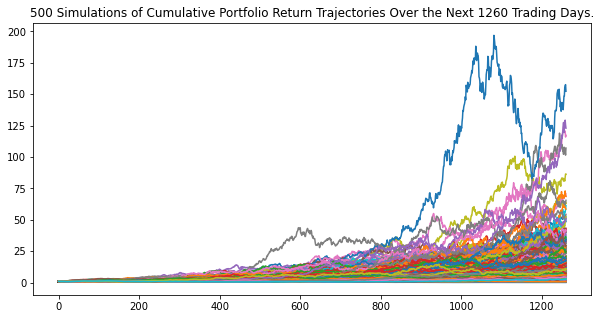

In [134]:
 # Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

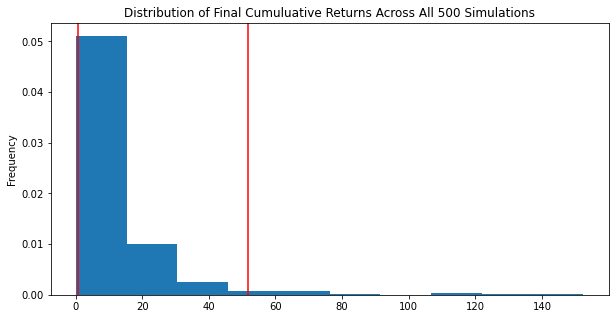

In [135]:
dist_plot = MC_5year.plot_distribution()

In [136]:
even_tbl = MC_5year.summarize_cumulative_return()
print(even_tbl)

count           500.000000
mean             11.611109
std              15.580028
min               0.115512
25%               3.530795
50%               6.456055
75%              14.376270
max             152.377584
95% CI Lower      0.840595
95% CI Upper     51.863146
Name: 1260, dtype: float64


In [137]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*500000,2)
even_ci_upper = round(even_tbl[9]*500000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $500,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $500,000 in the portfolio over the next 5 years will end within in the range of $420297.47 and $25931573.2.


##Sharpe Ratios - risk analysis


In [138]:
daily_std = df_ticker2.std().sort_values(ascending = False)
daily_std.head()

symbol
BTCUSD     8697.420153
ETHUSD      818.262384
TSLA        170.145971
AAPL         17.593460
DOGEUSD       0.108193
dtype: float64

In [139]:
sharpe_ratios = Daily_ret.mean()*252 / (Daily_ret.std()*np.sqrt(252))
sharpe_ratios.head()

symbol
AAPL       0.786531
BTCUSD     0.421889
DOGEUSD    1.340346
ETHUSD     0.964943
TSLA       0.436694
dtype: float64

<AxesSubplot:xlabel='symbol'>

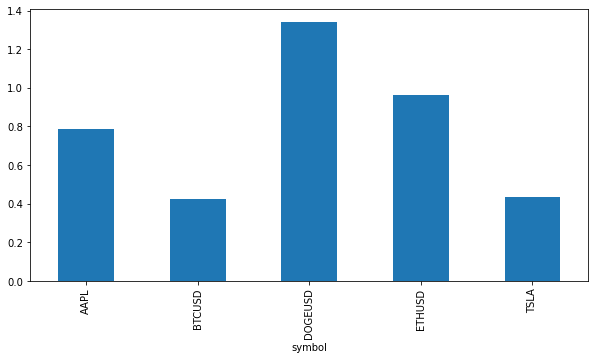

In [140]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios = sharpe_ratios.plot.bar(figsize=(10,5))
sharpe_ratios

In [141]:
#sharpe_ratios = sharpe_ratios.hvplot.bar(
    stacked = False,
    groupby='symbol',
    rot=90, 
    color='red'
    )
#sharpe_ratios

IndentationError: unexpected indent (81308760.py, line 2)

## Panel Dashboard

In [142]:
#tab1 

# Create a Title for the Dashboard
dashboard_title = '# Group 2 Project Presentation'

# Define objectives
welcome_text = 'Impact of prominet business influencers on asset prices!'

In [143]:
Portfolio_Returns = pn.Column((Portfolio_df_cum_plot.show(width = 0.1, hight=0.5)), sharpe_ratios)
Portfolio_Returns

NameError: name 'Portfolio_df_cum_plot' is not defined

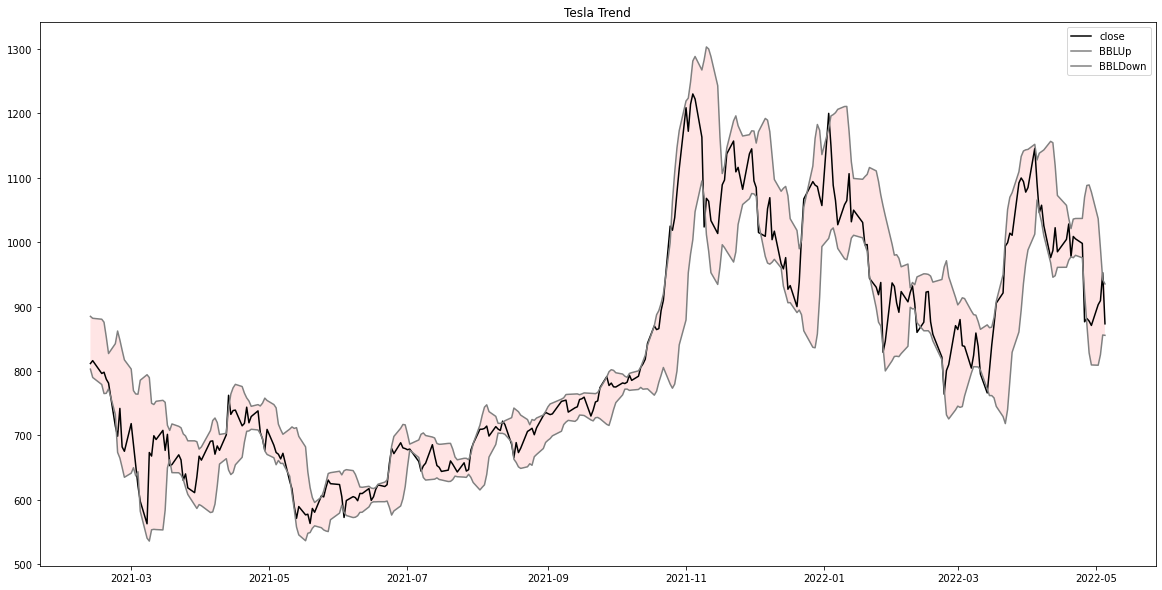

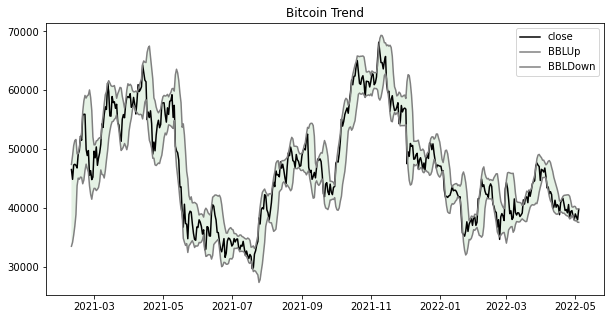

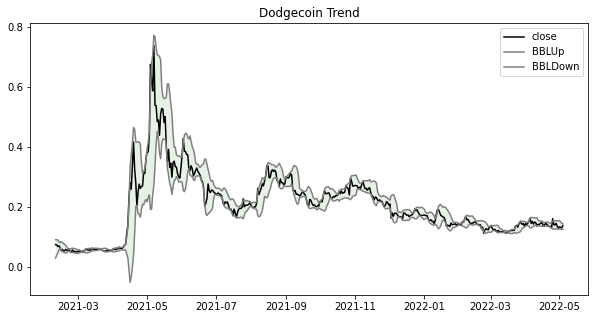

In [144]:
# 2nd tab: Billnger tabs

Stock = pn.Column(plot_tesla())
Crypto = pn.Column(plot_bitcoin(), plot_dodge())
Total = pn.Row(Stock, Crypto, dynamic=True)

In [145]:
Returns = pn.Row(Portfolio_df_cum_plot, sharpe_ratios)

NameError: name 'Portfolio_df_cum_plot' is not defined

In [147]:
# Create the main dashboard

import panel as pn

pn.extension()

dashboard = pn.Tabs(
        ("Portfolio Returns", portfolio_ret), 
        ('Box', box_plot),
        ("Ratios", sharpe_ratios),
        ('Monte', line_plot),
        ('Dist', dist_plot)
)


dashboard.servable()

Tabs
    [0] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive00166')
    [1] Plotly(Figure, name='Box')
    [2] Str(AxesSubplot, name='Ratios')
    [3] Str(AxesSubplot, name='Monte')
    [4] Str(AxesSubplot, name='Dist')